In [1]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import accuracy_score

In [4]:
import pandas as pd
import paddle
import numpy as np
%pylab inline
import seaborn as sns


train_df = pd.read_csv('data/data137276/train.csv.zip')
test_df = pd.read_csv('data/data137276/test.csv.zip')
# ,'pentakills','quadrakills','triplekills'
train_df = train_df.drop(['id', 'timecc' ], axis=1)#删除列
test_df = test_df.drop(['id', 'timecc'], axis=1)



Populating the interactive namespace from numpy and matplotlib


In [5]:
corr = abs(train_df.corr().loc['win']) 
corr = corr[corr<0.08] 
cols_to_drop = corr.index.to_list() 
train_df = train_df.drop(cols_to_drop, axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):


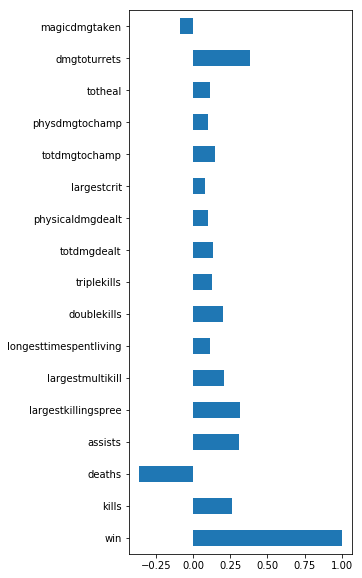

In [6]:
train_df.corr().loc['win'] .plot(kind='barh', figsize=(4,10))

In [11]:
# y = train_df.win
# x = train_df.drop('win',axis = 1)
# seed =5
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state = seed)

## 数据分析

In [ ]:
train_df.isnull().mean(0)#缺省值以及比例

In [ ]:
train_df.corr()

,win,kills,deaths,assists,largestkillingspree,largestmultikill,longesttimespentliving,doublekills,triplekills,quadrakills,...,totheal,totunitshealed,dmgtoturrets,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,wardsplaced,wardskilled,firstblood
win,1.000000,0.262337,-0.365656,0.305833,0.316502,0.210101,0.114497,0.204081,0.127686,0.062081,...,0.113540,0.044049,0.385483,-0.074434,-0.091173,-0.046872,-0.039278,0.030433,0.036427,0.064175
kills,0.262337,1.000000,0.171691,0.084407,0.806148,0.703828,0.137055,0.720063,0.416447,0.203719,...,0.173288,-0.169901,0.388956,0.392549,0.326306,0.346894,0.225831,-0.035084,-0.025995,0.198372
deaths,-0.365656,0.171691,1.000000,0.156695,-0.133511,0.124119,-0.221939,0.065552,0.016405,0.001487,...,0.111339,-0.004902,-0.068392,0.581940,0.535828,0.484942,0.302221,0.172751,0.066750,0.002883
assists,0.305833,0.084407,0.156695,1.000000,0.024763,0.050567,0.213380,0.009992,-0.009209,-0.008608,...,0.355378,0.367860,0.056894,0.343705,0.336371,0.270750,0.193364,0.512302,0.343283,-0.029702
largestkillingspree,0.316502,0.806148,-0.133511,0.024763,1.000000,0.627999,0.240254,0.611156,0.366198,0.181852,...,0.117962,-0.157788,0.371584,0.184669,0.132382,0.176682,0.109635,-0.076637,-0.043029,0.154956
largestmultikill,0.210101,0.703828,0.124119,0.050567,0.627999,1.000000,0.138380,0.762963,0.612354,0.367186,...,0.109470,-0.109097,0.318525,0.268430,0.213663,0.244781,0.146630,-0.034874,-0.019475,0.119841
longesttimespentliving,0.114497,0.137055,-0.221939,0.213380,0.240254,0.138380,1.000000,0.076882,0.039239,0.016650,...,0.191023,0.093827,0.119823,0.162588,0.144485,0.138335,0.088238,0.214055,0.164634,0.003635
doublekills,0.204081,0.720063,0.065552,0.009992,0.611156,0.762963,0.076882,1.000000,0.497732,0.224135,...,0.086119,-0.079782,0.305171,0.193588,0.160945,0.170560,0.114395,-0.061255,-0.029996,0.103435
triplekills,0.127686,0.416447,0.016405,-0.009209,0.366198,0.612354,0.039239,0.497732,1.000000,0.427355,...,0.042889,-0.028413,0.188164,0.089947,0.072939,0.079403,0.059691,-0.035451,-0.012398,0.053507
quadrakills,0.062081,0.203719,0.001487,-0.008608,0.181852,0.367186,0.016650,0.224135,0.427355,1.000000,...,0.018875,-0.008009,0.095294,0.036405,0.027332,0.033002,0.027776,-0.015755,-0.007188,0.018706


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


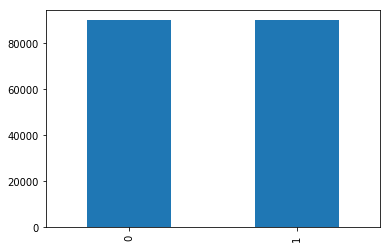

In [ ]:
train_df['win'].value_counts().plot(kind='bar')

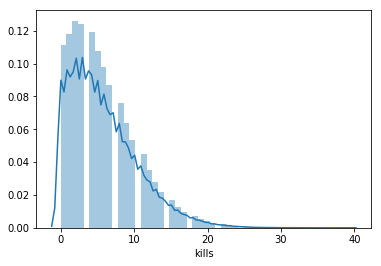

In [ ]:
sns.distplot(train_df['kills'])

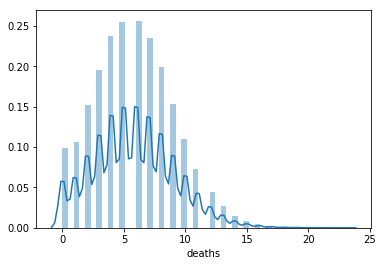

In [ ]:
sns.distplot(train_df['deaths'])

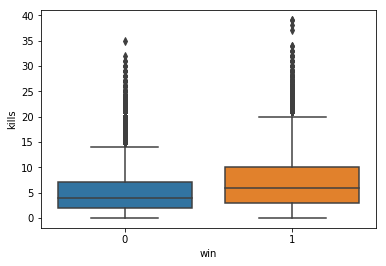

In [ ]:
sns.boxplot(y='kills', x='win', data=train_df)

Text(0,0.5,'deaths')

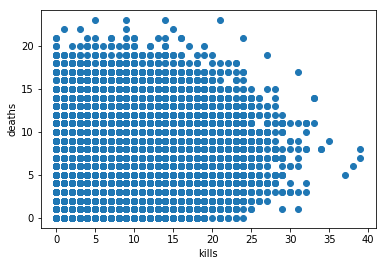

In [ ]:
plt.scatter(train_df['kills'], train_df['deaths'])
plt.xlabel('kills')
plt.ylabel('deaths')

## 搭建模型

In [7]:
for col in train_df.columns[1:]:#归一化
    train_df[col] /= train_df[col].max()
    test_df[col] /= test_df[col].max()

In [8]:
class Classifier(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Classifier, self).__init__()
        
        self.fc1 = paddle.nn.Linear(in_features=16, out_features=128)
        self.fc2 = paddle.nn.Linear(in_features=128, out_features=64)
        self.fc3 = paddle.nn.Linear(in_features=64, out_features=32)
        self.fc4 = paddle.nn.Linear(in_features=32, out_features=1)
        self.relu = paddle.nn.ReLU()
 
    # 网络的前向计算
    def forward(self, inputs):
        x = self.relu(self.fc1(inputs))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.relu(x)

        return x

In [9]:
model = Classifier()
model.train()
opt = paddle.optimizer.SGD(learning_rate=0.02, parameters=model.parameters())
loss_fn = paddle.nn.BCEWithLogitsLoss()

W0704 21:23:23.352166 38800 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 10.1
W0704 21:23:23.356123 38800 device_context.cc:465] device: 0, cuDNN Version: 7.6.


In [19]:
# paddle.save(model.state_dict(), "model.pdparams")
# paddle.save(opt.state_dict(), "opt.pdopt")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/framework/io.py:729: UserWarning: The input state dict is empty, no need to save.
  warnings.warn("The input state dict is empty, no need to save.")


In [27]:
!pip install paddle2onnx onnx onnxruntime -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple


In [29]:
# from paddle.static import InputSpec
# path = "example.model/linear"
# paddle.jit.save(model, path)

ValueError: No valid transformed program for function: forward(inputs), input_spec: None.
	    Please specific `input_spec` in `@paddle.jit.to_static` or feed input tensor to call the decorated function at once.


In [15]:

EPOCH_NUM = 700   # 设置外层循环次数 尽量大
BATCH_SIZE = 256  # 设置batch大小  根据硬件调整
# 优化算法
training_data = train_df.iloc[:-1000].values.astype(np.float32)
val_data = train_df.iloc[-1000:].values.astype(np.float32)

# 定义外层循环
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)
    
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    
    train_loss = []
    train_acc = []
    for iter_id, mini_batch in enumerate(mini_batches):
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()

        x = np.array(mini_batch[:, 1:])
        y = np.array(mini_batch[:, :1])
        
        # 将numpy数据转为飞桨动态图tensor的格式
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        # 前向计算
        predicts = model(features)
        
        # 计算损失
        loss = loss_fn(predicts, label=y)
        avg_loss = paddle.mean(loss)
        acc = accuracy_score((predicts > 0).astype(int).flatten(),y.flatten().astype(int))
        train_acc.append(acc)
        train_loss.append(avg_loss.numpy())
        
        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()

        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
    
    mini_batches = [val_data[k:k+BATCH_SIZE] for k in range(0, len(val_data), BATCH_SIZE)]
    val_loss = []
    val_acc = []
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, 1:])
        y = np.array(mini_batch[:, :1])
        
        features = paddle.to_tensor(x)
        y = paddle.to_tensor(y)
        
        predicts = model(features)
        loss = loss_fn(predicts, label=y)
        avg_loss = paddle.mean(loss)
        acc = accuracy_score((predicts > 0).astype(int).flatten(),y.flatten().astype(int))
        val_acc.append(acc)
        val_loss.append(avg_loss.numpy())

    print(f'Epoch {epoch_id}, train acc {np.mean(train_acc)}, val acc {np.mean(val_acc)}')

    test_data1 = paddle.to_tensor(xtest.values.astype(np.float32))
    test_predict1 = model(test_data1)
    test_predict1 = (test_predict1 > 0).astype(int).flatten()
    print(accuracy_score(yytest1,test_predict1.numpy()))

In [17]:
model.eval()
test_data = paddle.to_tensor(test_df.values.astype(np.float32))
test_predict = model(test_data)
test_predict = (test_predict > 0).astype(int).flatten()

In [28]:
# model.eval()
# test_data1 = paddle.to_tensor(xtest.values.astype(np.float32))
# test_predict1 = model(test_data1)
# test_predict1 = (test_predict1 > 0).astype(int).flatten()
# accuracy_score(yytest1,test_predict1.numpy())

0.8454444444444444

In [12]:
# yytest = paddle.to_tensor(ytest.values.astype(np.float32))
# yytest1 = (yytest > 0).astype(int).flatten()
# type(yytest1)

paddle.Tensor

In [ ]:
# accuracy_score(yytest1,test_predict1.numpy())

0.4838148148148148

In [16]:
# roc_auc_score(ytest,test_predict1.numpy())

0.8452906841543517

In [ ]:
# roc_curve(ytest,test_predict1)

(array([0.        , 0.00421006, 1.        ]),
 array([0.       , 0.0134834, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [18]:
pd.DataFrame({'win':
              test_predict.numpy()
             }).to_csv('submission.csv', index=None)

!zip submission.zip submission.csv

updating: submission.csv (deflated 90%)


## 总结与上分点

1. 原始赛题字段存在关联，可以进一步提取交叉特征。
2. 模型训练过程中可以加入验证集验证过程。